# Phishing URL Detection 

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the data
6. Comparision of Model

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

## 1. Loading Data

In [2]:
#Loading data into dataframe

data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,HTTPSDomainURL,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,class
0,1,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,-1
1,2,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,-1,1,-1,1,-1,-1
3,4,1,0,-1,1,1,-1,1,1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,5,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,-1,1


## 2. Familiarizing with Data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [3]:
data.shape

(96576, 25)

In [4]:
# #Shape of dataframe
# data=df1.iloc[0:11055,:]

In [5]:
#Listing the features of the dataset
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'HTTPSDomainURL', 'RequestURL',
       'AnchorURL', 'InfoEmail', 'AbnormalURL', 'WebsiteForwarding',
       'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection',
       'AgeofDomain', 'DNSRecording', 'WebsiteTraffic', 'PageRank',
       'GoogleIndex', 'LinksPointingToPage', 'class'],
      dtype='object')

In [6]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96576 entries, 0 to 96575
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                96576 non-null  int64
 1   UsingIP              96576 non-null  int64
 2   LongURL              96576 non-null  int64
 3   ShortURL             96576 non-null  int64
 4   Symbol@              96576 non-null  int64
 5   Redirecting//        96576 non-null  int64
 6   PrefixSuffix-        96576 non-null  int64
 7   SubDomains           96576 non-null  int64
 8   HTTPS                96576 non-null  int64
 9   HTTPSDomainURL       96576 non-null  int64
 10  RequestURL           96576 non-null  int64
 11  AnchorURL            96576 non-null  int64
 12  InfoEmail            96576 non-null  int64
 13  AbnormalURL          96576 non-null  int64
 14  WebsiteForwarding    96576 non-null  int64
 15  DisableRightClick    96576 non-null  int64
 16  UsingPopupWindow     9

In [7]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,96576.0,48288.500000,27879.234136,1.0,24144.75,48288.5,72432.25,96576.0
UsingIP,96576.0,0.299909,0.953973,-1.0,-1.00,1.0,1.00,1.0
LongURL,96576.0,-0.633356,0.765936,-1.0,-1.00,-1.0,-1.00,1.0
ShortURL,96576.0,0.738465,0.674295,-1.0,1.00,1.0,1.00,1.0
Symbol@,96576.0,0.695597,0.718436,-1.0,1.00,1.0,1.00,1.0
Redirecting//,96576.0,0.741406,0.671061,-1.0,1.00,1.0,1.00,1.0
PrefixSuffix-,96576.0,-0.735297,0.677749,-1.0,-1.00,-1.0,-1.00,1.0
SubDomains,96576.0,0.070960,0.816797,-1.0,-1.00,0.0,1.00,1.0
HTTPS,96576.0,0.250683,0.911735,-1.0,-1.00,1.0,1.00,1.0
HTTPSDomainURL,96576.0,0.675157,0.737678,-1.0,1.00,1.0,1.00,1.0


## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

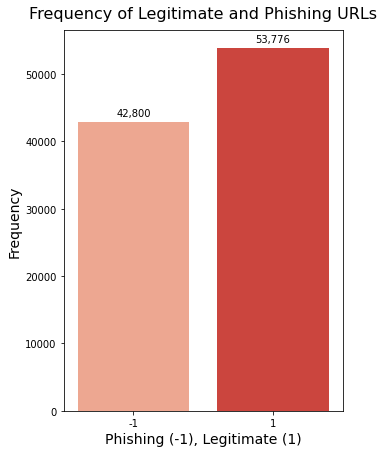

In [8]:
# Phishing Count in Count Plots
plt.figure(figsize = (5, 7))        
bar = sns.countplot(x=data["class"], 
              data=data, 
              palette="Reds")
for p in bar.patches:
    bar.annotate(format(p.get_height(), ','), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Frequency of Legitimate and Phishing URLs', fontsize = 16, pad = 12)
plt.xlabel('Phishing (-1), Legitimate (1)', fontsize = 14)
plt.ylabel("Frequency",fontsize = 14)
plt.show();

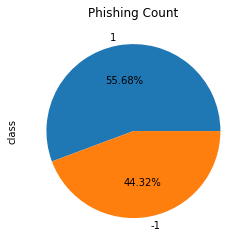

In [9]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## 4. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [10]:
# # Splitting the dataset into dependant and independant feature

X = data[['UsingIP', 'LongURL', 'ShortURL',
       'Symbol@', 'Redirecting//', 'PrefixSuffix-', 'SubDomains', 'HTTPS',
       'HTTPSDomainURL', 'RequestURL', 'AnchorURL', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'DisableRightClick', 'UsingPopupWindow',
       'IframeRedirection', 'AgeofDomain', 'DNSRecording', 'WebsiteTraffic',
       'PageRank', 'GoogleIndex', 'LinksPointingToPage']]
y = data["class"]

In [11]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#X_train.shape, y_train.shape, X_test.shape, y_test.shape

## 5. Model Building & Training:

1. Logistic Regression
2. k-Nearest Neighbors 
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Xgboost
9. Multilayer Perceptrons

              
The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [12]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## 1. Logistic Regression

In [13]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [14]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [15]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.918
Logistic Regression : Accuracy on test Data: 0.918

Logistic Regression : f1_score on training Data: 0.928
Logistic Regression : f1_score on test Data: 0.928

Logistic Regression : Recall on training Data: 0.939
Logistic Regression : Recall on test Data: 0.941

Logistic Regression : precision on training Data: 0.917
Logistic Regression : precision on test Data: 0.915


In [16]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.92      0.89      0.91      8505
           1       0.92      0.94      0.93     10811

    accuracy                           0.92     19316
   macro avg       0.92      0.92      0.92     19316
weighted avg       0.92      0.92      0.92     19316



In [17]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

## 2. K-Nearest Neighbors : Classifier

In [18]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [20]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.972
K-Nearest Neighbors : Accuracy on test Data: 0.971

K-Nearest Neighbors : f1_score on training Data: 0.974
K-Nearest Neighbors : f1_score on test Data: 0.974

K-Nearest Neighborsn : Recall on training Data: 0.975
Logistic Regression : Recall on test Data: 0.974

K-Nearest Neighbors : precision on training Data: 0.974
K-Nearest Neighbors : precision on test Data: 0.974


In [21]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.97      0.97      0.97      8505
           1       0.97      0.97      0.97     10811

    accuracy                           0.97     19316
   macro avg       0.97      0.97      0.97     19316
weighted avg       0.97      0.97      0.97     19316



In [22]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

## 3. Support Vector Machine : Classifier

In [23]:
# # Support Vector Classifier model 
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# # defining parameter range
# param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

# svc = GridSearchCV(SVC(), param_grid)

# # fitting the model for grid search
# svc.fit(X_train, y_train)


In [24]:
# #predicting the target value from the model for the samples
# y_train_svc = svc.predict(X_train)
# y_test_svc = svc.predict(X_test)

In [25]:
# #computing the accuracy, f1_score, Recall, precision of the model performance

# acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
# acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
# print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
# print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
# print()

# f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
# f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
# print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
# print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
# print()

# recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
# recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
# print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
# print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
# print()

# precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
# precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
# print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
# print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

In [26]:
# #computing the classification report of the model

# print(metrics.classification_report(y_test, y_test_svc))

In [27]:
# #storing the results. The below mentioned order of parameter passing is important.

# storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
#              recall_score_train_svc,precision_score_train_svc)

## 4. Naive Bayes : Classifier

In [28]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [29]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [30]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.580
Naive Bayes Classifier : Accuracy on test Data: 0.576

Naive Bayes Classifier : f1_score on training Data: 0.393
Naive Bayes Classifier : f1_score on test Data: 0.391

Naive Bayes Classifier : Recall on training Data: 0.245
Naive Bayes Classifier : Recall on test Data: 0.243

Naive Bayes Classifier : precision on training Data: 1.000
Naive Bayes Classifier : precision on test Data: 1.000


In [31]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_nb))

              precision    recall  f1-score   support

          -1       0.51      1.00      0.68      8505
           1       1.00      0.24      0.39     10811

    accuracy                           0.58     19316
   macro avg       0.75      0.62      0.53     19316
weighted avg       0.78      0.58      0.52     19316



In [32]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

## 5. Decision Trees : Classifier

In [33]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [34]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [35]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.979
Decision Tree : Accuracy on test Data: 0.976

Decision Tree : f1_score on training Data: 0.981
Decision Tree : f1_score on test Data: 0.979

Decision Tree : Recall on training Data: 0.987
Decision Tree : Recall on test Data: 0.985

Decision Tree : precision on training Data: 0.975
Decision Tree : precision on test Data: 0.973


In [36]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97      8505
           1       0.97      0.99      0.98     10811

    accuracy                           0.98     19316
   macro avg       0.98      0.98      0.98     19316
weighted avg       0.98      0.98      0.98     19316



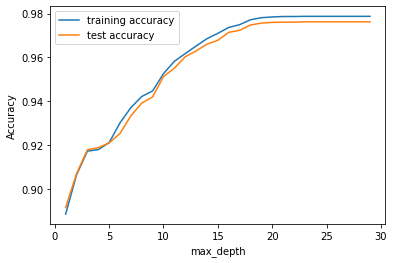

In [37]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [38]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

## 6. Random Forest : Classifier

In [39]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [40]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [41]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.979
Random Forest : Accuracy on test Data: 0.976

Random Forest : f1_score on training Data: 0.981
Random Forest : f1_score on test Data: 0.979

Random Forest : Recall on training Data: 0.987
Random Forest : Recall on test Data: 0.985

Random Forest : precision on training Data: 0.975
Random Forest : precision on test Data: 0.973


In [42]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97      8505
           1       0.97      0.99      0.98     10811

    accuracy                           0.98     19316
   macro avg       0.98      0.98      0.98     19316
weighted avg       0.98      0.98      0.98     19316



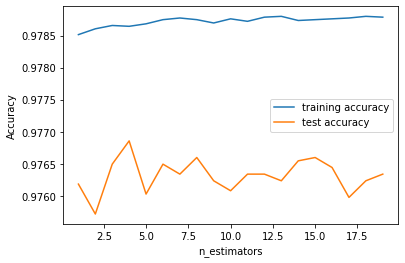

In [43]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [44]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

## 7.Gradient Boosting Classifier

In [45]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [46]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [47]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.976
Gradient Boosting Classifier : Accuracy on test Data: 0.972

Gradient Boosting Classifier : f1_score on training Data: 0.978
Gradient Boosting Classifier : f1_score on test Data: 0.975

Gradient Boosting Classifier : Recall on training Data: 0.982
Gradient Boosting Classifier : Recall on test Data: 0.981

Gradient Boosting Classifier : precision on training Data: 0.974
Gradient Boosting Classifier : precision on test Data: 0.970


In [48]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.97      8505
           1       0.97      0.98      0.98     10811

    accuracy                           0.97     19316
   macro avg       0.97      0.97      0.97     19316
weighted avg       0.97      0.97      0.97     19316



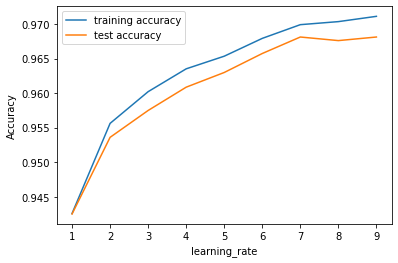

In [49]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

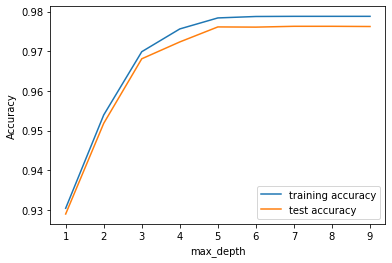

In [50]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [51]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 8. XGBoost Classifier


In [52]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [53]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)
#y_pred = le.inverse_transform(y_pred)

In [54]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb,pos_label='positive',average='micro')
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb,pos_label='positive',average='micro')
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb,pos_label='positive',average='micro')
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.977
XGBoost Classifier : Accuracy on test Data: 0.548

XGBoost Classifier : f1_score on training Data: 0.979
XGBoost Classifier : f1_score on test Data: 0.548

XGBoost Classifier : Recall on training Data: 0.980
XGBoost Classifier : Recall on test Data: 0.980

XGBoost Classifier : precision on training Data: 0.978
XGBoost Classifier : precision on test Data: 0.978


In [55]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

# 9. Multi-layer Perceptron classifier

In [56]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [57]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [58]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp,pos_label='positive',average='micro')
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp,pos_label='positive',average='micro')
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp,pos_label='positive',average='micro')
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.977
Multi-layer Perceptron : Accuracy on test Data: 0.549

Multi-layer Perceptron : f1_score on training Data: 0.979
Multi-layer Perceptron : f1_score on test Data: 0.979

Multi-layer Perceptron : Recall on training Data: 0.981
Multi-layer Perceptron : Recall on test Data: 0.549

Multi-layer Perceptron : precision on training Data: 0.978
Multi-layer Perceptron : precision on test Data: 0.549


In [59]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

##  Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [60]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [61]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.918,0.928,0.939,0.917
1,K-Nearest Neighbors,0.971,0.974,0.975,0.974
2,Naive Bayes Classifier,0.576,0.391,0.245,1.000
3,Decision Tree,0.976,0.979,0.987,0.975
4,Random Forest,0.976,0.979,0.987,0.975
5,Gradient Boosting Classifier,0.972,0.975,0.982,0.974
6,XGBoost Classifier,0.548,0.548,0.980,0.978
7,Multi-layer Perceptron,0.549,0.549,0.981,0.978


In [62]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [63]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Decision Tree,0.976,0.979,0.987,0.975
1,Random Forest,0.976,0.979,0.987,0.975
2,Gradient Boosting Classifier,0.972,0.975,0.982,0.974
3,K-Nearest Neighbors,0.971,0.974,0.975,0.974
4,Logistic Regression,0.918,0.928,0.939,0.917
5,Naive Bayes Classifier,0.576,0.391,0.245,1.000
6,Multi-layer Perceptron,0.549,0.549,0.981,0.978
7,XGBoost Classifier,0.548,0.548,0.980,0.978


## Storing Best Model

In [64]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [65]:
import pickle

# dump information to that file
pickle.dump(gbc, open('pickle/model.pkl', 'wb'))

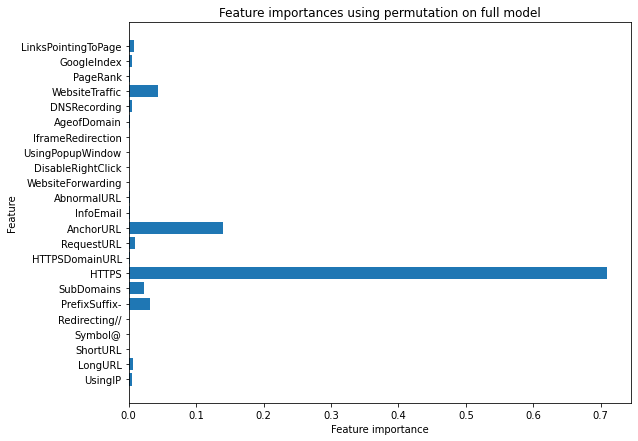

In [66]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

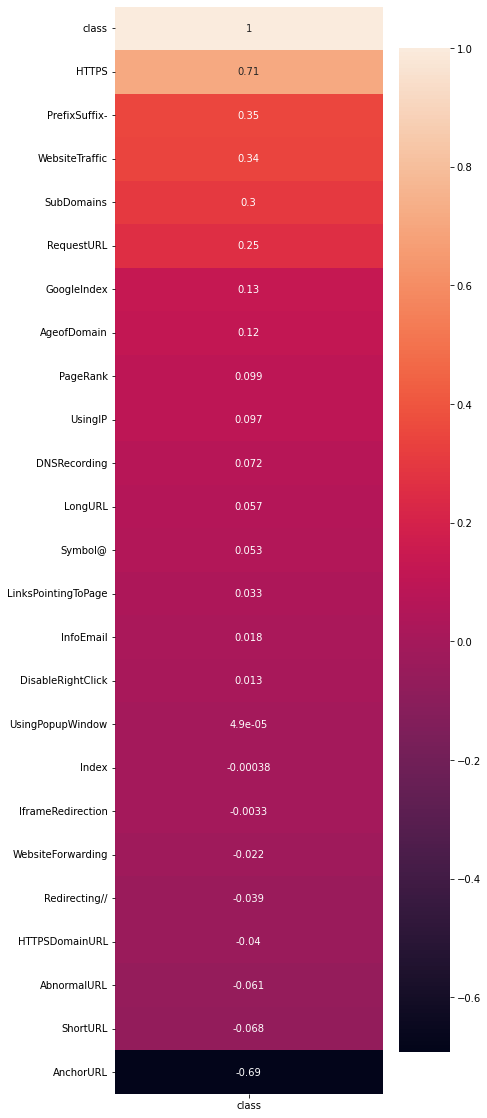

In [67]:
#Heatmap
plt.figure(figsize=(6,20))
sns.heatmap(data.corr()[['class']].sort_values('class', ascending=False), annot=True);